In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import missingno as msno

### Data

In [2]:
file_path = Path.cwd() / "data" / "donnees_candidats_dev_python.csv"

In [3]:
data = pd.read_csv(file_path, encoding='latin-1')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14380 entries, 0 to 14379
Data columns (total 49 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Type Ligne                               14380 non-null  object 
 1   Identifiant de l'élément                 14380 non-null  int64  
 2   Structure                                14380 non-null  object 
 3   Statut de l'élément                      14380 non-null  object 
 4   Nom base français                        14380 non-null  object 
 5   Nom attribut français                    13160 non-null  object 
 6   Nom frontière français                   6710 non-null   object 
 7   Code de la catégorie                     14380 non-null  object 
 8   Tags français                            9549 non-null   object 
 9   Unité français                           14304 non-null  object 
 10  Contributeur                             14365

In [5]:
data.columns

Index(['Type Ligne', 'Identifiant de l'élément', 'Structure',
       'Statut de l'élément', 'Nom base français', 'Nom attribut français',
       'Nom frontière français', 'Code de la catégorie', 'Tags français',
       'Unité français', 'Contributeur', 'Programme', 'Url du programme',
       'Source', 'Localisation géographique',
       'Sous-localisation géographique français', 'Date de création',
       'Date de modification', 'Période de validité', 'Incertitude',
       'Réglementations', 'Transparence', 'Qualité', 'Qualité TeR',
       'Qualité GR', 'Qualité TiR', 'Qualité C', 'Qualité P', 'Qualité M',
       'Commentaire français', 'Type poste', 'Nom poste français',
       'Total poste non décomposé', 'CO2f', 'CH4f', 'CH4b', 'N2O',
       'Code gaz supplémentaire 1', 'Valeur gaz supplémentaire 1',
       'Code gaz supplémentaire 2', 'Valeur gaz supplémentaire 2',
       'Code gaz supplémentaire 3', 'Valeur gaz supplémentaire 3',
       'Code gaz supplémentaire 4', 'Valeur gaz sup

### Missing data

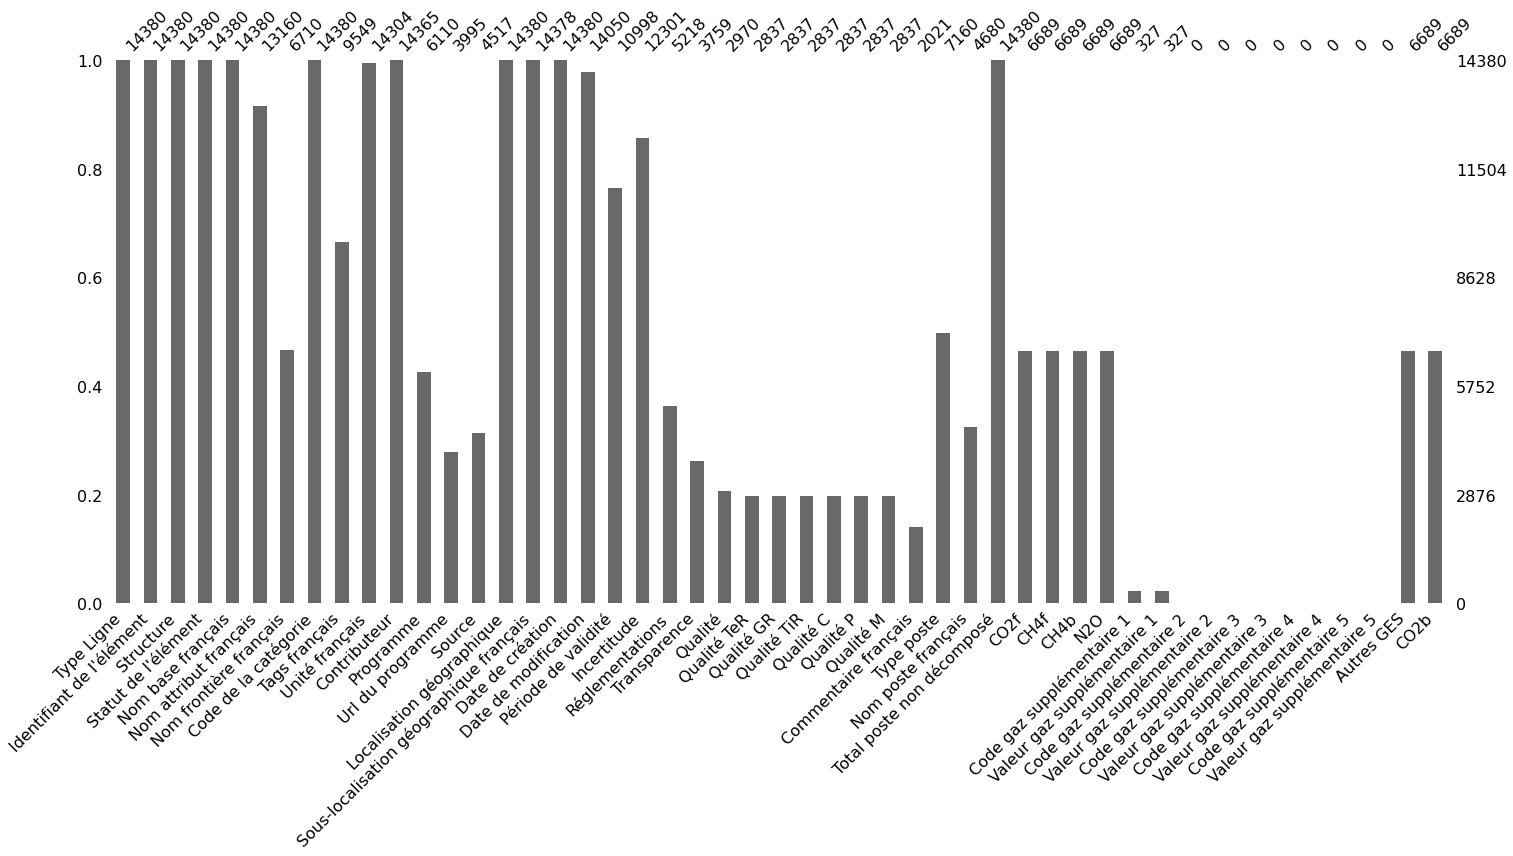

In [41]:
msno.bar(data);

### Empty columns

In [140]:
def remove_null_columns(data):
    return data.drop(["Code gaz supplémentaire 2",
                      "Valeur gaz supplémentaire 2",
                      "Code gaz supplémentaire 3",
                      "Valeur gaz supplémentaire 3",
                      "Code gaz supplémentaire 4",
                      "Valeur gaz supplémentaire 4",
                      "Code gaz supplémentaire 5",
                      "Valeur gaz supplémentaire 5"], axis=1)

In [141]:
data = remove_null_columns(data)
data.head(3)

,Type Ligne,Identifiant de l'élément,Structure,Statut de l'élément,Nom base français,Nom attribut français,Nom frontière français,Code de la catégorie,Tags français,Unité français,...,Nom poste français,Total poste non décomposé,CO2f,CH4f,CH4b,N2O,Code gaz supplémentaire 1,Valeur gaz supplémentaire 1,Autres GES,CO2b
0,Elément,12892,élément décomposé par poste et par gaz,Archivé,Agglomérés de houille,NaN,NaN,Combustibles > Fossiles > Solides > Charbons,NaN,kgCO2e/kWh PCI,...,NaN,0.370,0.3530,0.0163,0.0,0.0,NaN,NaN,0.0,0.0
1,Poste,12892,élément décomposé par poste et par gaz,Archivé,Agglomérés de houille,NaN,NaN,Combustibles > Fossiles > Solides > Charbons,NaN,kgCO2e/kWh PCI,...,NaN,0.344,0.3440,0.0000,0.0,0.0,NaN,NaN,0.0,0.0
2,Poste,12892,élément décomposé par poste et par gaz,Archivé,Agglomérés de houille,NaN,NaN,Combustibles > Fossiles > Solides > Charbons,NaN,kgCO2e/kWh PCI,...,NaN,0.026,0.0097,0.0163,0.0,0.0,NaN,NaN,0.0,0.0
3,Elément,12893,élément décomposé par poste et par gaz,Archivé,Agglomérés de houille,NaN,NaN,Combustibles > Fossiles > Solides > Charbons,NaN,kgCO2e/tep PCI,...,NaN,4278.000,4089.0000,189.0000,0.0,0.0,NaN,NaN,0.0,0.0
4,Poste,12893,élément décomposé par poste et par gaz,Archivé,Agglomérés de houille,NaN,NaN,Combustibles > Fossiles > Solides > Charbons,NaN,kgCO2e/tep PCI,...,NaN,3977.000,3977.0000,0.0000,0.0,0.0,NaN,NaN,0.0,0.0


### Refuted data

In [138]:
data = pd.read_csv(file_path, encoding='utf-8')

In [176]:
data["Statut de l'élément"].nunique(), data["Statut de l'élément"].unique()

(5,
 array(['Archivé', 'Valide générique', 'En discussion', 'Refusé',
        'Valide spécifique'], dtype=object))

In [139]:
def remove_false_data(data):
    return data[~data["Statut de l'élément"].str.contains('Refusé')].copy()

In [ ]:
data = remove_false_data(data)
data.head(3)

### Invalid data

In [144]:
def remove_invalid_data(data):
    return data#[~data["Période de validité"]]

In [145]:
data = remove_invalid_data(data)
data.head(3)

,Type Ligne,Identifiant de l'élément,Structure,Statut de l'élément,Nom base français,Nom attribut français,Nom frontière français,Code de la catégorie,Tags français,Unité français,...,Nom poste français,Total poste non décomposé,CO2f,CH4f,CH4b,N2O,Code gaz supplémentaire 1,Valeur gaz supplémentaire 1,Autres GES,CO2b
0,Elément,12892,élément décomposé par poste et par gaz,Archivé,Agglomérés de houille,NaN,NaN,Combustibles > Fossiles > Solides > Charbons,NaN,kgCO2e/kWh PCI,...,NaN,0.370,0.3530,0.0163,0.0,0.0,NaN,NaN,0.0,0.0
1,Poste,12892,élément décomposé par poste et par gaz,Archivé,Agglomérés de houille,NaN,NaN,Combustibles > Fossiles > Solides > Charbons,NaN,kgCO2e/kWh PCI,...,NaN,0.344,0.3440,0.0000,0.0,0.0,NaN,NaN,0.0,0.0
2,Poste,12892,élément décomposé par poste et par gaz,Archivé,Agglomérés de houille,NaN,NaN,Combustibles > Fossiles > Solides > Charbons,NaN,kgCO2e/kWh PCI,...,NaN,0.026,0.0097,0.0163,0.0,0.0,NaN,NaN,0.0,0.0


### Categories

In [66]:
data = pd.read_csv(file_path)

In [67]:
def find_len_cat(data):
    cat = data["Code de la catégorie"].str.split(' > ')

    len_cat = [len(val) for val in cat.values]

    return f'min: {np.min(len_cat)}, max: {np.max(len_cat)}'

In [68]:
find_len_cat(data)

'min: 2, max: 6'

In [69]:
data[['Cat1', 'Cat2', 'Cat3', 'Cat4', 'Cat5', 'Cat6']] = data["Code de la catégorie"].str.split(" > ", expand = True)

In [70]:
data['Cat1'].nunique(), data['Cat1'].unique()

(12,
 array(['Combustibles', 'Process et émissions fugitives', 'UTCF',
        'Electricité', 'Statistiques territoriales', 'Achats de biens',
        'Achats de services', 'Transport de marchandises',
        'Transport de personnes', 'Traitement des déchets', 'PRG',
        'Réseaux de chaleur / froid'], dtype=object))

In [71]:
categories = data.groupby('Cat1')
for cat, df in categories:
    print(f'{cat}: {df["Cat2"].nunique()} categories \n {df.index.nunique():,} values')
    print(f'{df["Cat2"].unique()}')
    print(f'Units: {df["Unité français"].unique()} \n')

Achats de biens: 15 categories 
 3,899 values
['Métaux et produits métalliques' 'Produits minéraux non métalliques'
 'Papier, carton' 'Autres produits manufacturés'
 'Plastiques et produits chimiques' 'Machines et équipements'
 "Produits de l'agriculture et de la pêche" 'Bois' 'Minerais, granulats'
 "Bâtiments, ouvrages d'art et voirie"
 'Véhicules automobiles et autres matériels de transport' 'Mobilier'
 "Eau, traitement et distribution d'eau" 'Textile et habillement'
 'Produits agro-alimentaires, plats préparés et boissons']
Units: ['kgCO2e/tonne' 'kgCO2e/kg' 'kgCO2e/euro dépensé' 'kgCO2e/appareil'
 'kgCO2e/tonne de P2O5' 'kgCO2e/kg de matière active' 'kgCO2e/livre'
 'kgCO2e/keuro' 'kgCO2e/litre' 'kgCO2e/m²' 'kgCO2e/mL'
 'kgCO2e/m² de paroi' 'kgCO2e/m² de toiture' 'kgCO2e/m² de sol' '%'
 'kgCO2e/m de route' 'kgCO2e/tonne de matière sèche' 'kgCO2e/tonne brute'
 'kgCO2e/tonne de N' 'kgCO2e/tonne de K2O' 'kgCO2e/100 feuilles A4'
 'kgCO2e/unité' 'kgCO2e/m³' 'kgCO2e/kg de poids vif' "kgCO

#### Regional heat data

In [73]:
regional_heat_data = data[data['Cat1']=="Réseaux de chaleur / froid"].copy()
regional_heat_data.dropna(axis=1, how='all', inplace=True)
regional_heat_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1240 entries, 11300 to 14139
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Type Ligne                               1240 non-null   object 
 1   Identifiant de l'élément                 1240 non-null   int64  
 2   Structure                                1240 non-null   object 
 3   Statut de l'élément                      1240 non-null   object 
 4   Nom base français                        1240 non-null   object 
 5   Nom attribut français                    1240 non-null   object 
 6   Nom frontière français                   1240 non-null   object 
 7   Code de la catégorie                     1240 non-null   object 
 8   Tags français                            1240 non-null   object 
 9   Unité français                           1240 non-null   object 
 10  Contributeur                             12

In [74]:
for col in regional_heat_data.columns:
    print(f'{col}: {regional_heat_data[col].nunique()} unique values')
    print(f'{regional_heat_data[col].unique()}')

Type Ligne: 1 unique values
['Elément']
Identifiant de l'élément: 1240 unique values
[26035 26036 26037 ... 27769 27770 27771]
Structure: 1 unique values
['élément non décomposé']
Statut de l'élément: 2 unique values
['Archivé' 'Valide générique']
Nom base français: 3 unique values
['Réseau de chaleur' 'Réseau de Froid' 'Réseau de froid']
Nom attribut français: 886 unique values
['1, Bourg-en-Bresse, La Reyssouze' '1, Oyonnax, La Forge'
 '1, Oyonnax, La Plaine (HLM)'
 '1, Saint-Denis-les-Bourg, Réseau de Saint-Denis-les-Bourg'
 '1, Marignieu, Belena' '1, Val-Revermont, Réseau de Treffort'
 '2, Saint-Quentin, ZUP du Quartier Europe' '2, Soissons, ZUP de Presles'
 '2, Laon, Réseau de Laon' "2, Urcel, Réseau d'Urcel"
 '3, Moulins, Réseau de Moulins' '3, Montluçon, Fontbouillant'
 '3, Mayet-de-Montagne, Réseau de Mayet-de-Montagne' '3, Meaulne, Meaulne'
 '4, Manosque, RCU Manosque ZAC Chanteprunier'
 '5, Embrun, Réseau bois Delaroche' '5, Embrun, Réseau Quartier Gare'
 "6, Nice, Sonitherm-

In [75]:
def remove_archived_data(data):
    return data[data["Statut de l'élément"] != 'Archivé']

In [76]:
regional_heat_data = remove_archived_data(regional_heat_data)

In [79]:
unit = regional_heat_data['Unité français'].unique()[0]
validity = regional_heat_data['Période de validité'].unique()[0]
uncertainty = regional_heat_data['Incertitude'].unique()[0]

regional_heat_data = regional_heat_data.drop(["Type Ligne",
                                             "Structure",
                                             "Identifiant de l'élément",
                                             "Statut de l'élément",
                                             "Unité français",
                                             "Contributeur",
                                             "Programme",
                                             "Url du programme",
                                             "Source",
                                             "Localisation géographique",
                                             "Date de création",
                                             "Date de modification",
                                             "Réglementations",
                                             "Cat1"
                                            ], axis=1
)

In [80]:
regional_heat_data.head()

,Statut de l'élément,Nom base français,Nom attribut français,Nom frontière français,Code de la catégorie,Tags français,Sous-localisation géographique français,Période de validité,Incertitude,Total poste non décomposé,Cat2,Cat3
13465,Valide générique,Réseau de chaleur,"1, Bourg-en-Bresse, La Reyssouze",2018,Réseaux de chaleur / froid > Rhône-Alpes > 1. Ain,"Réseau de chaleur, Bourg-en-Bresse, La Reyssouze","Rhône-Alpes, Bourg-en-Bresse",2020,30%,0.141,Rhône-Alpes,1. Ain
13466,Valide générique,Réseau de chaleur,"1, Hauteville Lompnes, Réseau dHauteville Lom...",2018,Réseaux de chaleur / froid > Rhône-Alpes > 1. Ain,"Réseau de chaleur, Réseau dHauteville Lompnes...","Rhône-Alpes, Hauteville Lompnes",2020,30%,0.000,Rhône-Alpes,1. Ain
13467,Valide générique,Réseau de chaleur,"1, Saint-Denis-les-Bourg, Réseau de Saint-Deni...",2018,Réseaux de chaleur / froid > Rhône-Alpes > 1. Ain,"Réseau de chaleur, Saint-Denis-les-Bourg, Rése...","Rhône-Alpes, Saint-Denis-les-Bourg",2020,30%,0.100,Rhône-Alpes,1. Ain
13468,Valide générique,Réseau de chaleur,"1, Belley, Belena",2018,Réseaux de chaleur / froid > Rhône-Alpes > 1. Ain,"Réseau de chaleur, Belena, Belley","Rhône-Alpes, Belley",2020,30%,0.025,Rhône-Alpes,1. Ain
13469,Valide générique,Réseau de chaleur,"1, Treffort-Cuisiat, Réseau de Treffort",2018,Réseaux de chaleur / froid > Rhône-Alpes > 1. Ain,"Réseau de chaleur, Réseau de Treffort, Treffor...","Rhône-Alpes, Treffort-Cuisiat",2020,30%,0.273,Rhône-Alpes,1. Ain


In [284]:
regional_heat_data[['Nom base français','Localisation géographique','Sous-localisation géographique français','Cat1', 'Cat2', 'Cat3']]

,Nom base français,Localisation géographique,Sous-localisation géographique français,Cat1,Cat2,Cat3
11300,Réseau de chaleur,France continentale,"Rhône-Alpes, Bourg-en-Bresse",Réseaux de chaleur / froid,Rhône-Alpes,1. Ain
11301,Réseau de chaleur,France continentale,"Rhône-Alpes, Oyonnax",Réseaux de chaleur / froid,Rhône-Alpes,1. Ain
11302,Réseau de chaleur,France continentale,"Rhône-Alpes, Oyonnax",Réseaux de chaleur / froid,Rhône-Alpes,1. Ain
11303,Réseau de chaleur,France continentale,"Rhône-Alpes, Saint-Denis-les-Bourg",Réseaux de chaleur / froid,Rhône-Alpes,1. Ain
11304,Réseau de chaleur,France continentale,"Rhône-Alpes, Marignieu",Réseaux de chaleur / froid,Rhône-Alpes,1. Ain
...,...,...,...,...,...,...
14135,Réseau de froid,France continentale,"Ile-de-France, Roissy",Réseaux de chaleur / froid,Île-de-France,95. Val-d'Oise
14136,Réseau de chaleur,France continentale,"Ile-de-France, Franconville",Réseaux de chaleur / froid,Île-de-France,95. Val-d'Oise
14137,Réseau de chaleur,France continentale,"Ile-de-France, Villiers-le-Bel",Réseaux de chaleur / froid,Île-de-France,95. Val-d'Oise
14138,Réseau de chaleur,France continentale,"Ile-de-France, Pontoise",Réseaux de chaleur / froid,Île-de-France,95. Val-d'Oise


### Structures

In [174]:
data = pd.read_csv(file_path, encoding='utf-8')

In [175]:
data["Structure"].nunique(), data["Structure"].unique()

(4,
 array(['élément décomposé par poste et par gaz', 'élément non décomposé',
        'élément décomposé par gaz', 'élément décomposé par poste'],
       dtype=object))

In [171]:
a = data[data['Structure'] == "élément décomposé par poste et par gaz"]

In [173]:
a[a['Type Ligne'] =='Poste']

,Type Ligne,Identifiant de l'élément,Structure,Statut de l'élément,Nom base français,Nom attribut français,Nom frontière français,Code de la catégorie,Tags français,Unité français,...,Nom poste français,Total poste non décomposé,CO2f,CH4f,CH4b,N2O,Code gaz supplémentaire 1,Valeur gaz supplémentaire 1,Autres GES,CO2b
1,Poste,12892,élément décomposé par poste et par gaz,Archivé,Agglomérés de houille,NaN,NaN,Combustibles > Fossiles > Solides > Charbons,NaN,kgCO2e/kWh PCI,...,NaN,0.344,0.3440,0.0000,0.000000,0.00000,NaN,NaN,0.000,0.0
2,Poste,12892,élément décomposé par poste et par gaz,Archivé,Agglomérés de houille,NaN,NaN,Combustibles > Fossiles > Solides > Charbons,NaN,kgCO2e/kWh PCI,...,NaN,0.026,0.0097,0.0163,0.000000,0.00000,NaN,NaN,0.000,0.0
4,Poste,12893,élément décomposé par poste et par gaz,Archivé,Agglomérés de houille,NaN,NaN,Combustibles > Fossiles > Solides > Charbons,NaN,kgCO2e/tep PCI,...,NaN,3977.000,3977.0000,0.0000,0.000000,0.00000,NaN,NaN,0.000,0.0
5,Poste,12893,élément décomposé par poste et par gaz,Archivé,Agglomérés de houille,NaN,NaN,Combustibles > Fossiles > Solides > Charbons,NaN,kgCO2e/tep PCI,...,NaN,301.000,112.0000,189.0000,0.000000,0.00000,NaN,NaN,0.000,0.0
7,Poste,12894,élément décomposé par poste et par gaz,Archivé,Agglomérés de houille,NaN,NaN,Combustibles > Fossiles > Solides > Charbons,NaN,kgCO2e/tonne,...,NaN,3040.000,3040.0000,0.0000,0.000000,0.00000,NaN,NaN,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13458,Poste,27094,élément décomposé par poste et par gaz,Valide générique,"GNC, Gaz Naturel Comprimé pour véhicule routier",NaN,NaN,Combustibles > Fossiles > Liquides > Usage sou...,"GNV, gaz naturel véhicule, GNC, Gaz Naturel Co...",kgCO2e/tep PCI,...,NaN,2180.000,2174.0000,0.0000,0.000000,5.54000,NaN,NaN,0.000,0.0
13460,Poste,27095,élément décomposé par poste et par gaz,Valide générique,"GNC, Gaz Naturel Comprimé pour véhicule routier",NaN,NaN,Combustibles > Fossiles > Liquides > Usage sou...,"GNV, gaz naturel véhicule, GNC, Gaz Naturel Co...",kgCO2e/kg,...,NaN,0.550,0.3210,0.0675,0.000180,0.00339,NaN,NaN,0.158,0.0
13461,Poste,27095,élément décomposé par poste et par gaz,Valide générique,"GNC, Gaz Naturel Comprimé pour véhicule routier",NaN,NaN,Combustibles > Fossiles > Liquides > Usage sou...,"GNV, gaz naturel véhicule, GNC, Gaz Naturel Co...",kgCO2e/kg,...,NaN,2.410,2.4000,0.0000,0.000000,0.00612,NaN,NaN,0.000,0.0
13463,Poste,27096,élément décomposé par poste et par gaz,Valide générique,"GNC, Gaz Naturel Comprimé pour véhicule routier",NaN,NaN,Combustibles > Fossiles > Liquides > Usage sou...,"GNV, gaz naturel véhicule, GNC, Gaz Naturel Co...",kgCO2e/m3,...,NaN,0.434,0.2530,0.0534,0.000143,0.00270,NaN,NaN,0.125,0.0


### Units

In [54]:
units = data[~data["Unité français"].isna()].copy()

In [60]:
units[units["Unité français"].str.contains('kgCO2e/kg')]['Code de la catégorie'].unique()

array(['Combustibles > Fossiles > Solides > Charbons',
       'Combustibles > Fossiles > Solides > Cokes',
       'Combustibles > Fossiles > Gazeux > Propane et butane',
       'Combustibles > Fossiles > Gazeux > Gaz naturel',
       'Combustibles > Fossiles > Liquides > Usage sources mobiles > Usage routier',
       'Combustibles > Fossiles > Liquides > Usage sources mobiles > Usage aérien',
       'Combustibles > Fossiles > Liquides > Usage sources mobiles > Usage maritime et fluvial',
       'Combustibles > Fossiles > Liquides > Usage sources mobiles > Autres usages',
       'Combustibles > Fossiles > Liquides > Usage source fixe',
       'Combustibles > Fossiles > Liquides > Pétrole brut',
       'Combustibles > Organiques > Solides',
       'Process et émissions fugitives > Déchets > Traitement des eaux usées > Eaux usées urbaines',
       'Achats de biens > Produits minéraux non métalliques > Verres et articles en verre > Verres plats',
       "Achats de biens > Produits minéraux

In [44]:
data["Unité français"].unique()

array(['kgCO2e/kWh PCI', 'kgCO2e/tep PCI', 'kgCO2e/tonne',
       'kgCO2e/GJ PCI', 'kgCO2e/kg', 'kgCO2e/litre', 'kgCO2e/kWh PCS',
       'kgCO2e/m3 (n)', 'GJ / tonne', 'kgCO2e/ha', 'kgCO2e/MJ PCI',
       'kg de fluide / kW frigo', '%', 'kg de fluide / m³ de stockage',
       'kg de fluide', 'kg de fluide / m²', 'Kg de fluide / équipement',
       '4500', '750', 'kgCO2e/kg NTK', 'kgCO2e/kg DCO éliminée',
       'kgCO2e/tonne de clinker', 'kgCO2e/tonne produites',
       'kgCO2e/GJ PCS', 'kgCO2e/tep PCS', 'kgCO2e/ha.an', 'kgCO2e/kWh',
       'kgCO2e/actif', 'jours', 'km', 'kgCO2e/véhicule.km',
       'kgCO2e/véhicule.an', 'kgCO2e/euro dépensé', 'kgCO2e/appareil',
       'kgCO2e/tonne de P2O5', 'kgCO2e/kg de matière active',
       'kgCO2e/livre', 'kgCO2e/keuro', 'kgCO2e/unité', 'kgCO2e/repas',
       'kgCO2e/m²', 'kgCO2e/mL', 'kgCO2e/m² de paroi',
       'kgCO2e/m² de toiture', 'kgCO2e/m² de sol', 'kgCO2e/m de route',
       'kgCO2e/tonne de matière sèche', 'kgCO2e/tonne brute',
       

In [74]:
data[data["Unité français"]=='kgCO2e'].loc[:,["Nom base français",'Total poste non décomposé']]

,Nom base français,Total poste non décomposé
10885,Chocolat chaud,0.047800
10886,Chocolat chaud,0.000004
10887,Chocolat chaud,0.000004
10888,Chocolat chaud,0.415000
10889,Chocolat chaud,0.040600
10890,Chocolat chaud,0.084400
10891,Chocolat chaud,0.588000


In [75]:
data.loc[10885:10891]

,Type Ligne,Identifiant de l'élément,Structure,Statut de l'élément,Nom base français,Nom attribut français,Nom frontière français,Code de la catégorie,Tags français,Unité français,...,Code gaz supplémentaire 2,Valeur gaz supplémentaire 2,Code gaz supplémentaire 3,Valeur gaz supplémentaire 3,Code gaz supplémentaire 4,Valeur gaz supplémentaire 4,Code gaz supplémentaire 5,Valeur gaz supplémentaire 5,Autres GES,CO2b
10885,Poste,25745,élément décomposé par poste,Valide générique,Chocolat chaud,plats prêt à manger,NaN,"Achats de biens > Produits agro-alimentaires, ...","BOISSON, food GES, lait, chocolat, plats, cuis...",kgCO2e,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10886,Poste,25745,élément décomposé par poste,Valide générique,Chocolat chaud,plats prêt à manger,NaN,"Achats de biens > Produits agro-alimentaires, ...","BOISSON, food GES, lait, chocolat, plats, cuis...",kgCO2e,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10887,Poste,25745,élément décomposé par poste,Valide générique,Chocolat chaud,plats prêt à manger,NaN,"Achats de biens > Produits agro-alimentaires, ...","BOISSON, food GES, lait, chocolat, plats, cuis...",kgCO2e,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10888,Poste,25745,élément décomposé par poste,Valide générique,Chocolat chaud,plats prêt à manger,NaN,"Achats de biens > Produits agro-alimentaires, ...","BOISSON, food GES, lait, chocolat, plats, cuis...",kgCO2e,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10889,Poste,25745,élément décomposé par poste,Valide générique,Chocolat chaud,plats prêt à manger,NaN,"Achats de biens > Produits agro-alimentaires, ...","BOISSON, food GES, lait, chocolat, plats, cuis...",kgCO2e,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10890,Poste,25745,élément décomposé par poste,Valide générique,Chocolat chaud,plats prêt à manger,NaN,"Achats de biens > Produits agro-alimentaires, ...","BOISSON, food GES, lait, chocolat, plats, cuis...",kgCO2e,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10891,Elément,25745,élément décomposé par poste,Valide générique,Chocolat chaud,plats prêt à manger,NaN,"Achats de biens > Produits agro-alimentaires, ...","BOISSON, food GES, lait, chocolat, plats, cuis...",kgCO2e,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
data[data["Unité français"]=='kg / m³'].loc[:,["Nom base français",'Total poste non décomposé']]

,Nom base français,Total poste non décomposé
14369,Gaz naturel,654.0
14370,GPL pour véhicule routier,538.0
14371,Propane,515.0
14372,Fioul lourd,900.0
14373,Fioul domestique,845.0
14374,Essence - SP 95,755.0
14375,Kérosène,800.0
14376,Carbureacteur,800.0
14377,Pétrole Brut,900.0
14378,Butane,585.0
